### divergence_notebook

Below is a notebook that contains code for understanding the divergence of an experiment

TODO: Anonymise this code

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from collections import defaultdict

Dealing with WANDB Data

In [78]:
print("DEBUG: Unpacking data")
results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/wandb_run_data/norm-norm-1.csv"
results = pd.read_csv(results_path)

#results = results.fillna(0)

strategies = ['h.', '1.', '10.', 't.']
results_by_strategy = []

for strategy in strategies:
    results_by_strategy.append(results.filter(like='experiment_score_' + strategy))
results_by_strategy[0]


DEBUG: Unpacking data


,experiment_score_h.76.0,experiment_score_h.38.0,experiment_score_h.46.0,experiment_score_h.90.0,experiment_score_h.68.0,experiment_score_h.15.0,experiment_score_h.53.0,experiment_score_h.61.0,experiment_score_h.41.0,experiment_score_h.4.0,...,experiment_score_h.52.0,experiment_score_h.56.0,experiment_score_h.29.0,experiment_score_h.48.0,experiment_score_h.21.0,experiment_score_h.67.0,experiment_score_h.39.0,experiment_score_h.20.0,experiment_score_h.16.0,experiment_score_h.27.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.301371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092844,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11932
3,NaN,0.09614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.136714,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.412229,NaN,NaN
486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.004789,NaN,NaN,0.28312,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
results_by_strategy = [df.rename(columns=lambda x: x.replace('experiment_score_'+strategy, '')) for df, strategy in zip(results_by_strategy,strategies)]
for i in range(len(results_by_strategy)):
    results_by_strategy[i] = results_by_strategy[i].reindex(sorted(results_by_strategy[i].columns, key=lambda x: float(x)), axis=1)

results_by_strategy[0]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
0,NaN,NaN,NaN,NaN,0.079324,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.323137,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.083618,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.327243,NaN,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Divergence analysis

In [81]:
# Finding cumulative divergence for each strategy
print("DEBUG: Calculating cumulative divergence")
cumulative_divergence = []

for strategy in results_by_strategy:
    divergence_for_agent = []
    for column in strategy.columns:
        divergence_for_agent.append(strategy[column].sum())
    cumulative_divergence.append(divergence_for_agent)

# Find the agents with the highest divergence for each strategy
highest_divergence_agents = [np.argmax(divergence) for divergence in cumulative_divergence]

# Print the agents with the highest divergence for each strategy
for i, agent in enumerate(highest_divergence_agents):
    print(f"Strategy {strategies[i]}: Agent with highest divergence is {agent}")

# Calculate and print the average divergence for each strategy
average_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
for i, avg_div in enumerate(average_divergence):
    print(f"Strategy {strategies[i]}: Average divergence is {avg_div}")

# Print the divergence of the agent with the highest divergence for each strategy
for i, agent in enumerate(highest_divergence_agents):
    print(f"Strategy {strategies[i]}: Divergence of agent {agent} is {cumulative_divergence[i][agent]}")

# Finding the 99th percentile of agents
for i, strategy in enumerate(results_by_strategy):
    worst_off_divergence = cumulative_divergence[i]
    percentile_99 = np.percentile(worst_off_divergence, 99)
    print(f"Strategy {strategies[i]}: 99th percentile of the worst off agents' divergence: {percentile_99}")

    agents_outside_99th_percentile = [agent for agent in range(len(worst_off_divergence)) if worst_off_divergence[agent] > percentile_99]
    print(f"Strategy {strategies[i]}: Agents outside the 99th percentile: {agents_outside_99th_percentile}")

DEBUG: Calculating cumulative divergence
Strategy h.: Agent with highest divergence is 83
Strategy 1.: Agent with highest divergence is 83
Strategy 10.: Agent with highest divergence is 83
Strategy t.: Agent with highest divergence is 83
Strategy h.: Average divergence is 7.843018554865573
Strategy 1.: Average divergence is 7.986650438835425
Strategy 10.: Average divergence is 7.855263684318673
Strategy t.: Average divergence is 7.763695624910355
Strategy h.: Divergence of agent 83 is 18.060420287888512
Strategy 1.: Divergence of agent 83 is 17.84453370498478
Strategy 10.: Divergence of agent 83 is 18.074030017199668
Strategy t.: Divergence of agent 83 is 18.077569579866235
Strategy h.: 99th percentile of the worst off agents' divergence: 13.91688360409502
Strategy h.: Agents outside the 99th percentile: [83]
Strategy 1.: 99th percentile of the worst off agents' divergence: 13.686209828022173
Strategy 1.: Agents outside the 99th percentile: [83]
Strategy 10.: 99th percentile of the wor

Finding the average number of agents outside of a certain percentile for each strategy for every norm run

In [82]:
import pandas as pd
import numpy as np

# Repeat the process for all 10 runs
strategy_1 = []
strategy_10 = []
strategy_t = []
strategy_hcva = []
strategy_results = [strategy_1, strategy_10, strategy_t, strategy_hcva]
#for run in range(1, 11):
runs = ['classic-thunder-78', 'sunny-darkness-77', 'autumn-bird-76','skilled-yogurt-75', 'cool-aardvark-74']

print("DEBUG: Unpacking data")
all_data = pd.DataFrame()
i = 0
for run in runs:
    results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/wandb_run_data/"+run+".csv"
    results = pd.read_csv(results_path)
    results = results.fillna(0)
    print(results.columns)
    # Append the value of i to every column
    results = results.add_suffix(f'_{i}')
    i+=1
    all_data = pd.concat([all_data, results], ignore_index=True)

strategies = ['h.', '1.', '10.', 't.']

results_by_strategy = []

for strategy in strategies:
    results_by_strategy.append(all_data.filter(like='experiment_score_' + strategy))
results_by_strategy[0]

results_by_strategy = [df.rename(columns=lambda x: x.replace('experiment_score_'+strategy, '')) for df, strategy in zip(results_by_strategy,strategies)]
for i in range(len(results_by_strategy)):
    results_by_strategy[i] = results_by_strategy[i].reindex(sorted(results_by_strategy[i].columns, key=lambda x: float(x)), axis=1)

results_by_strategy[0]

# Finding cumulative divergence for each strategy
#print("DEBUG: Calculating cumulative divergence")

cumulative_divergence = []

for strategy in results_by_strategy:
    divergence_for_agent = []
    for column in strategy.columns:
        divergence_for_agent.append(strategy[column].sum())
    cumulative_divergence.append(divergence_for_agent)

# Find the agents with the highest divergence for each strategy
highest_divergence_agents = [np.argmax(divergence) for divergence in cumulative_divergence]

# Print the agents with the highest divergence for each strategy
#for i, agent in enumerate(highest_divergence_agents):
#    print(f"Strategy {strategies[i]}: Agent with highest divergence is {agent}")

# Calculate and print the average divergence for each strategy
#average_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
#for i, avg_div in enumerate(average_divergence):
#    print(f"Strategy {strategies[i]}: Average divergence is {avg_div}")

# Print the divergence of the agent with the highest divergence for each strategy
#for i, agent in enumerate(highest_divergence_agents):
#    print(f"Strategy {strategies[i]}: Divergence of agent {agent} is {cumulative_divergence[i][agent]}")

# Finding the 99th percentile of agents
"""
for i, strategy in enumerate(results_by_strategy):
    worst_off_divergence = cumulative_divergence[i]
    percentile_99 = np.percentile(worst_off_divergence, 98)
    #print(f"Strategy {strategies[i]}: 99th percentile of the worst off agents' divergence: {percentile_99}")

    agents_outside_99th_percentile = [agent for agent in range(len(worst_off_divergence)) if worst_off_divergence[agent] > percentile_99]
    #print(f"Strategy {strategies[i]}: Agents outside the 99th percentile: {agents_outside_99th_percentile}")
    strategy_results[i].append(agents_outside_99th_percentile)
"""


#print(cumulative_divergence)
mean_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
mean_divergence_of_all = np.mean(mean_divergence)
standard_deviation_divergence = [np.std(divergence) for divergence in cumulative_divergence]
# standardise this

boundary = 12
# Finding the statistically significant unsatisfied agents
for i, strategy in enumerate(results_by_strategy):
    #unsatisfied_agents = [agent for agent in range(len(cumulative_divergence[i])) if cumulative_divergence[i][agent] > mean_divergence[i] + 2 * standard_deviation_divergence[i]]
    unsatisfied_agents = [agent for agent in range(len(cumulative_divergence[i])) if cumulative_divergence[i][agent] > boundary]

    print(f"Strategy {strategies[i]}: Agents with total divergence more than 2 standard deviations from the mean: {unsatisfied_agents}")



DEBUG: Unpacking data
Index(['decisions_1', 'experiment_score_h.37.0', 'preference_consensus_h',
       'experiment_score_1.96.0', '_step', 'action_judgement_consensus_10',
       'action_judgement_consensus_1', 'experiment_score_h.8.0',
       'decisions_10', 'experiment_score_10.37.0',
       ...
       'experiment_score_h.82.0', 'experiment_score_h.70.0',
       'experiment_score_t.21.0', 'experiment_score_10.70.0',
       'experiment_score_1.54.0', 'experiment_score_10.54.0',
       'experiment_score_1.82.0', 'experiment_score_h.21.0',
       'experiment_score_1.70.0', 'experiment_score_t.70.0'],
      dtype='object', length=420)
Index(['experiment_score_t.37.0', 'experiment_score_h.8.0',
       'experiment_score_t.52.0', 'experiment_score_10.63.0',
       'experiment_score_1.44.0', 'experiment_score_t.2.0',
       'experiment_score_h.37.0', 'experiment_score_h.96.0',
       'experiment_score_t.12.0', 'experiment_score_t.1.0',
       ...
       'experiment_score_t.3.0', 'experiment

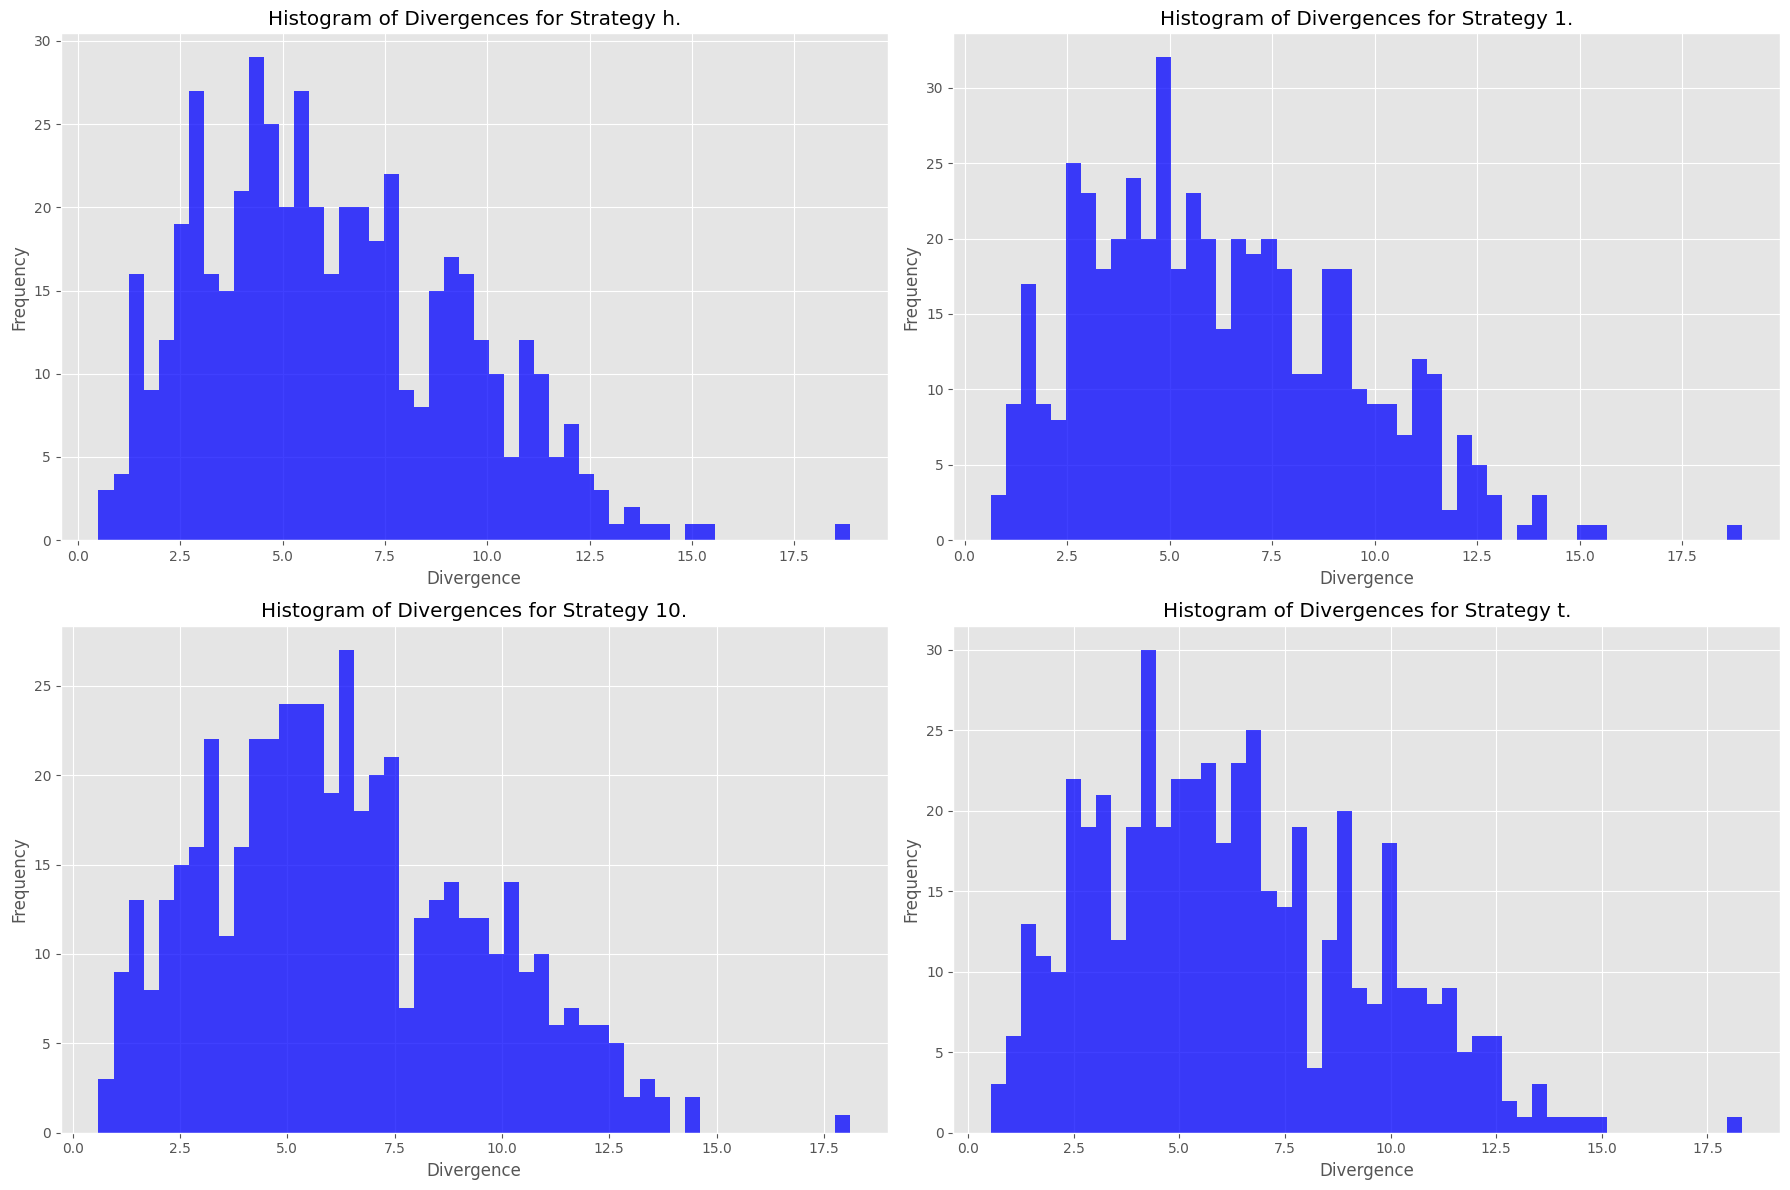

In [83]:
# Plot histograms of all divergences for each strategy
plt.figure(figsize=(18, 12))

for i, strategy_divergence in enumerate(cumulative_divergence):
    plt.subplot(2, 2, i+1)
    plt.hist(strategy_divergence, bins=50, alpha=0.75, color='blue')
    plt.title(f'Histogram of Divergences for Strategy {strategies[i]}')
    plt.xlabel('Divergence')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

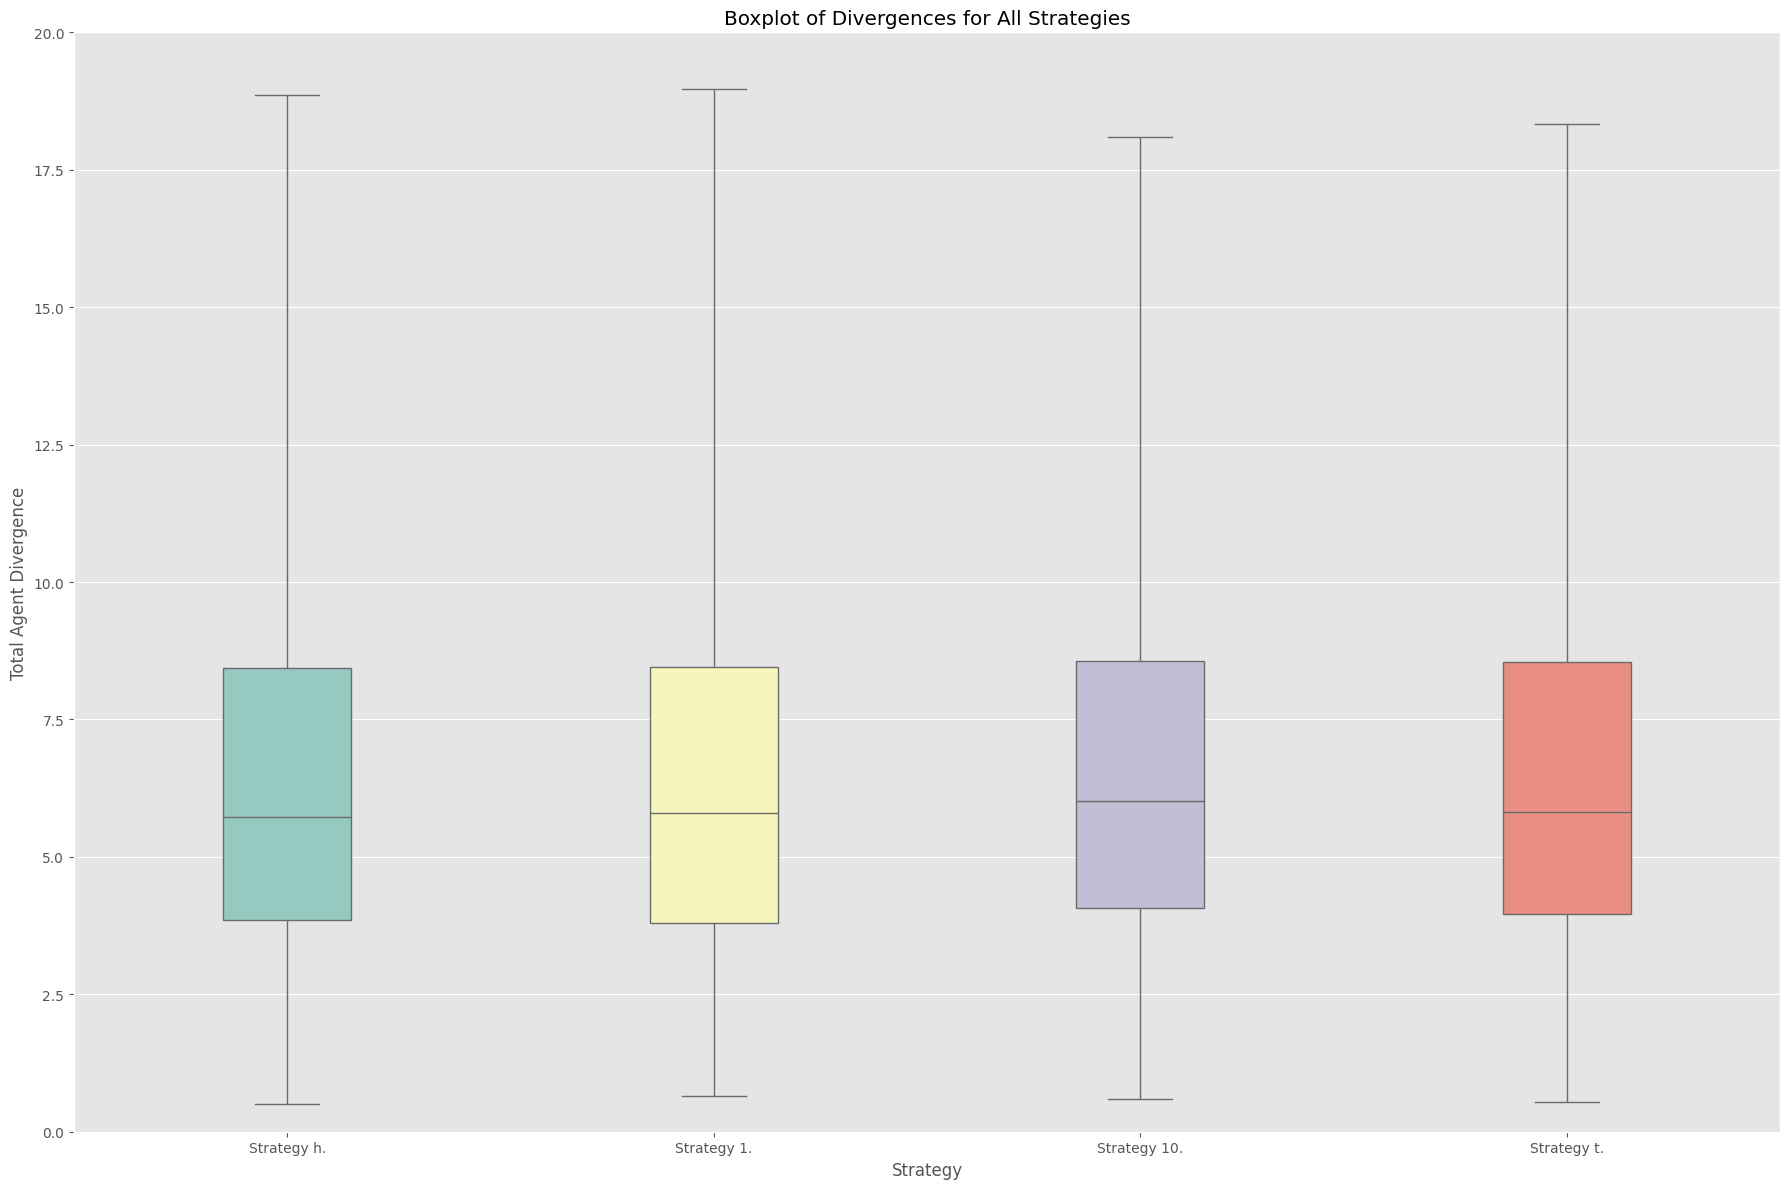

In [84]:
plt.style.use("ggplot")
plt.figure(figsize=(18, 12))

# Combine all divergences into a single DataFrame for plotting
combined_divergence = pd.DataFrame({
    'Strategy h.': cumulative_divergence[0],
    'Strategy 1.': cumulative_divergence[1],
    'Strategy 10.': cumulative_divergence[2],
    'Strategy t.': cumulative_divergence[3]
})

sns.boxplot(data=combined_divergence, width=0.3, whis=3, palette="Set3")
plt.title('Boxplot of Divergences for All Strategies')
plt.xlabel('Strategy')
plt.ylabel('Total Agent Divergence')
plt.ylim(0, 20)  # Set the y-axis limits

plt.tight_layout()
plt.show()

In [85]:
# Concatenate all divergences from each strategy into a single list
all_divergences = np.concatenate(cumulative_divergence)

# Calculate the 99th percentile for all divergences
percentile_99_all = np.percentile(all_divergences, 99)

print(f"The 99th percentile for all divergences over all strategies is {percentile_99_all}")

The 99th percentile for all divergences over all strategies is 13.70578582408611


In [86]:
from scipy.stats import skew

# Calculate skewness for each strategy
skewness_values = [skew(strategy) for strategy in cumulative_divergence]
for i, skewness in enumerate(skewness_values):
    print(f"Skewness for Strategy {strategies[i]}: {skewness}")

Skewness for Strategy h.: 0.5189321255999036
Skewness for Strategy 1.: 0.5233892001410166
Skewness for Strategy 10.: 0.4404279886917268
Skewness for Strategy t.: 0.4954538534165595


In [87]:
from scipy.stats import ttest_ind

# Perform t-tests between each pair of strategies
t_test_results = {}
for i in range(len(strategies)):
    for j in range(i + 1, len(strategies)):
        strategy_i = cumulative_divergence[i]
        strategy_j = cumulative_divergence[j]
        t_stat, p_value = ttest_ind(strategy_i, strategy_j)
        t_test_results[f"{strategies[i]} vs {strategies[j]}"] = (t_stat, p_value)

# Print the t-test results
for comparison, (t_stat, p_value) in t_test_results.items():
    print(f"T-test between {comparison}: t-statistic = {t_stat}, p-value = {p_value}")

T-test between h. vs 1.: t-statistic = -0.08515378906609881, p-value = 0.9321562070462981
T-test between h. vs 10.: t-statistic = -0.6622171348243883, p-value = 0.507984959107062
T-test between h. vs t.: t-statistic = -0.09546002364667927, p-value = 0.9239686053169454
T-test between 1. vs 10.: t-statistic = -0.5766654663874361, p-value = 0.5642955035710981
T-test between 1. vs t.: t-statistic = -0.010300135494894298, p-value = 0.9917838847776914
T-test between 10. vs t.: t-statistic = 0.566358586265806, p-value = 0.5712773744845521


---

### Max/Min over time

In [52]:
"""
For every context, find the agent that is the worst off in terms of divergence, and store as a list
see if one agent (or a small group of agents in a minority) are consistently the worst off
"""
df_dict = {}
unique_p_values = data['p_value'].unique()
# Split the DataFrame by P_Value
for p_value in unique_p_values:
    df_dict[f'df_p_{p_value}'] = data[data['p_value'] == p_value].reset_index(drop=True)
for key in df_dict.keys():
    df_dict[key] = df_dict[key].sort_values(by=['agent', 'context']).reset_index(drop=True)
results_dict = {}
# Iterate over each DataFrame in df_dict
for key, df in df_dict.items():
    # Group by 'context'
    grouped = df.groupby('context')
    max_min_list = []
    for name, group in grouped:
        max_row = group.loc[group['satisfaction'].idxmax()]
        min_row = group.loc[group['satisfaction'].idxmin()]
        max_min_list.append({
            'context': name,
            'agent_max': max_row['agent'],
            'satisfaction_max': max_row['satisfaction'],
            'agent_min': min_row['agent'],
            'satisfaction_min': min_row['satisfaction']
        })
    results_dict[key] = pd.DataFrame(max_min_list)

# Save results_dict to a .csv file
for key, df in results_dict.items():
    df.to_csv(f"{key}_results.csv", index=False)


## Cumulative Divergence

In [46]:
df_dict = {}
unique_p_values = data['p_value'].unique()
print("unique_p_values: ", unique_p_values)
# Split the DataFrame by P_Value
for p_value in unique_p_values:
    df_dict[f'df_p_{p_value}'] = data[data['p_value'] == p_value].reset_index(drop=True)
print("Df keys: ", df_dict.keys())

unique_p_values:  [0 1 2 3]
Df keys:  dict_keys(['df_p_0', 'df_p_1', 'df_p_2', 'df_p_3'])


In [47]:
print(df_dict['df_p_0'])

       context  p_value  agent  satisfaction
0            0        0   78.0      0.193128
1            0        0   69.0      0.123980
2            0        0   68.0      0.326464
3            0        0   25.0      0.022045
4            1        0   41.0      0.162506
...        ...      ...    ...           ...
32395       38        0   42.0      0.185328
32396       38        0   90.0      0.188128
32397       38        0   23.0      0.209505
32398       38        0   62.0      0.221764
32399       38        0   89.0      0.027335

[32400 rows x 4 columns]


In [48]:
results_dict = {}
# Iterate over each DataFrame in df_dict
for key, df in df_dict.items():
    # Group by continuous segments where 'context' is unchanging
    df['group'] = (df['context'] != df['context'].shift()).cumsum()
    # Sum the 'satisfaction' values for each group
    grouped = df.groupby('group').agg({
        'context': 'first',
        'satisfaction': 'sum'
    }).reset_index(drop=True)
    
    # Add the p_value to the grouped DataFrame
    grouped['p_value'] = df['p_value'].iloc[0]
    
    # Store the result in the dictionary with p_value as the key
    results_dict[f'df_p_{grouped["p_value"].iloc[0]}'] = grouped

# Print the keys of the results dictionary to verify
print(results_dict.keys())
print(results_dict['df_p_0'])

dict_keys(['df_p_0', 'df_p_1', 'df_p_2', 'df_p_3'])
      context  satisfaction  p_value
0           0      0.665617        0
1           1      1.076129        0
2           2      1.176029        0
3           3      1.294335        0
4           4      1.594306        0
...       ...           ...      ...
4207       34      1.545451        0
4208       35      5.131808        0
4209       36      5.342436        0
4210       37      4.751475        0
4211       38      3.872615        0

[4212 rows x 3 columns]
